In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_csv("train.csv")
df2= pd.read_csv("meal_info.csv")
df3= pd.read_csv("fulfilment_center_info.csv")

In [3]:
df_1_copy=df1.copy()
df_2_copy=df2.copy()
df_3_copy=df3.copy()

In [4]:
df_inner = pd.merge(df_1_copy, df_2_copy, on='meal_id', how='inner')

df_inner.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai


In [5]:
final_df=  pd.merge(df_inner, df_3_copy, on='center_id', how='inner')

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [7]:
final_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

# EXPLORATORY DATA ANALYSIS

### NUMBER OF ORDERS WEEKLY TREND

In [8]:
food_uptake_by_week= final_df.groupby('week')['num_orders'].sum()

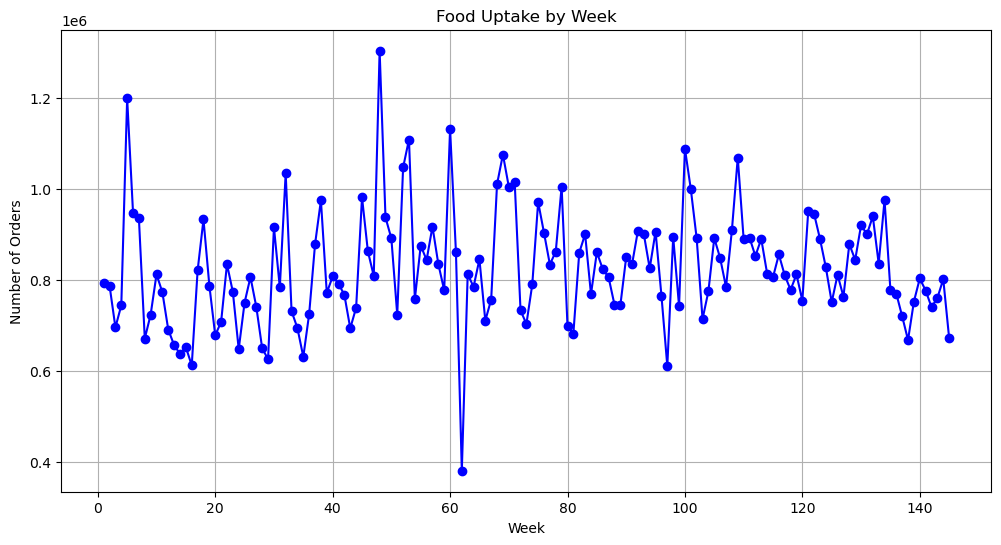

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(food_uptake_by_week.index, food_uptake_by_week.values, marker='o', linestyle='-', color='b')
plt.title('Food Uptake by Week')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

### Observation

* The data exhibits a fluctuating pattern with no clear long-term upward or downward trend.
* There are notable peaks and troughs throughout the timeline.- for instance we can see two high peaks between weeks 0 and 20, and weeks 40 and 60. There is also a sharp decline in weekly sales probably in week 61 or 62.
* There is considerable variability in the number of orders week-to-week.- The variability suggests factors such as seasonal changes or other external influences the demand of food per week.


### FOOD CATEGORY, CUISINE and NUMBER OF ORDERS

In [10]:
final_df['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [11]:
final_df['category'].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

#### WHICH TWO COMBINATIONS- CUISINE AND FOOD CATEGORIES WERE THE MOST ORDERD

In [12]:
food_combo= final_df.groupby(['category','cuisine'])['num_orders'].sum().sort_values(ascending=False)
food_combo

category      cuisine    
Rice Bowl     Indian         20874063
Beverages     Thai           18237630
Sandwich      Italian        17636782
Beverages     Italian        13953970
Salad         Italian        10944336
Pizza         Continental     7383720
Beverages     Continental     5943046
Other Snacks  Thai            4766293
Starters      Thai            4649122
Extras        Thai            3984979
Seafood       Continental     2715714
Beverages     Indian          2345879
Desert        Indian          1940754
Pasta         Italian         1637744
Soup          Thai            1039646
Fish          Continental      871959
Biryani       Indian           631848
Name: num_orders, dtype: int64

In [14]:
food_df=pd.DataFrame(food_combo)

In [16]:
food_df.reset_index(inplace=True)

In [17]:


# Concatenate first and last names with a space separator
food_df['Popular Combinations'] = food_df['category'] + '-' + food_df['cuisine']


food_df.drop(columns=['category', 'cuisine'], inplace=True)

# food_df

In [18]:
food_df

,num_orders,Popular Combinations
0,20874063,Rice Bowl-Indian
1,18237630,Beverages-Thai
2,17636782,Sandwich-Italian
3,13953970,Beverages-Italian
4,10944336,Salad-Italian
5,7383720,Pizza-Continental
6,5943046,Beverages-Continental
7,4766293,Other Snacks-Thai
8,4649122,Starters-Thai
9,3984979,Extras-Thai


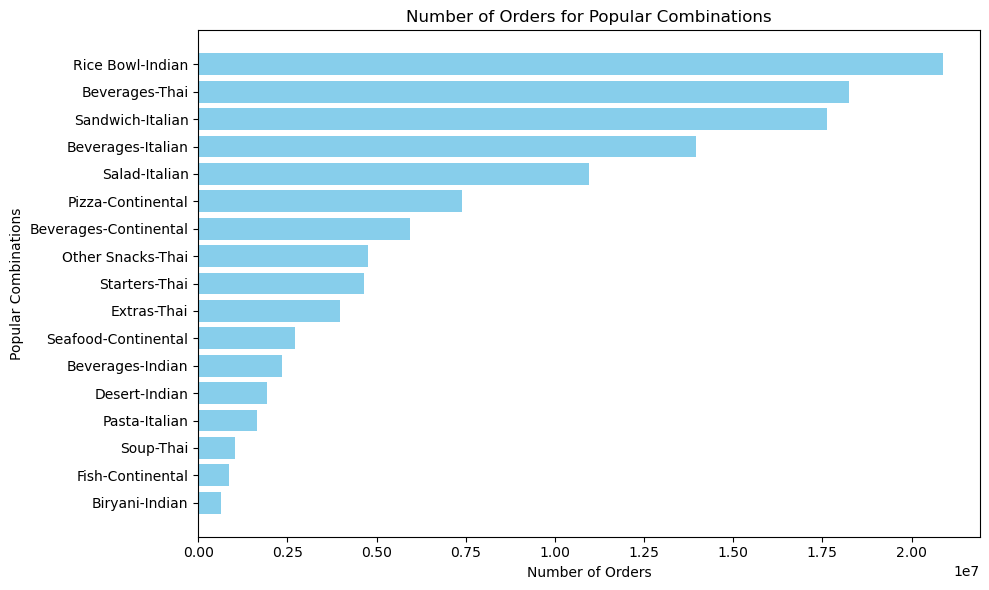

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(food_df['Popular Combinations'], food_df['num_orders'], color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Popular Combinations')
plt.title('Number of Orders for Popular Combinations')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

#### Observations
* Rice bowl from India is the most ordered type of food category.
* Most customers prefer the Thai beverage- drink
* The Italian Cuisine is also a favorite among the customers- we can see that their products are in the  top five most ordered meals i.e the Sandwich, Beverage and Salad.

Having this type of information can be useful in meal planning and inventory management

In [20]:
food_category= final_df.groupby('category')['num_orders'].sum().sort_values(ascending=False)
food_category

category
Beverages       40480525
Rice Bowl       20874063
Sandwich        17636782
Salad           10944336
Pizza            7383720
Other Snacks     4766293
Starters         4649122
Extras           3984979
Seafood          2715714
Desert           1940754
Pasta            1637744
Soup             1039646
Fish              871959
Biryani           631848
Name: num_orders, dtype: int64

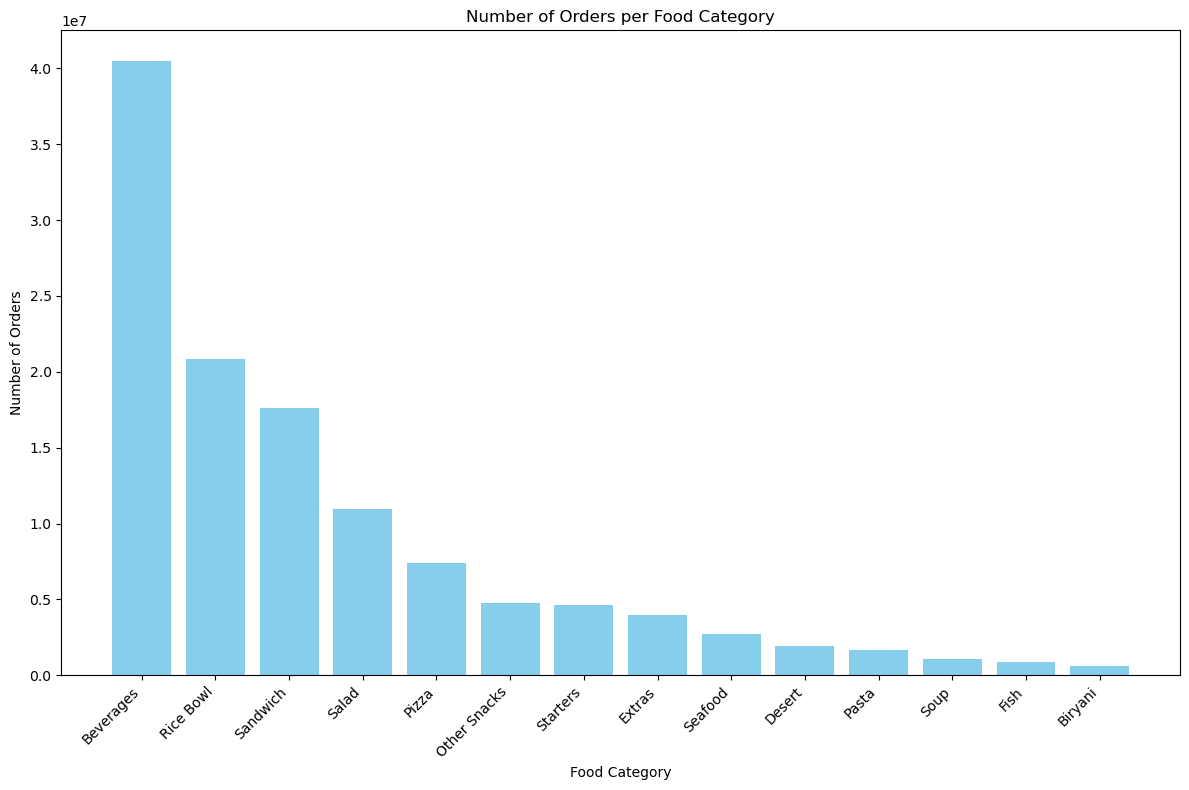

In [21]:
plt.figure(figsize=(12, 8))
plt.bar(food_category.index, food_category.values, color='skyblue')
plt.xlabel('Food Category')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Food Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations
* Beverges and the Rice bowl are the most ordered- this confirms the cuisine and the food category bar charts

### DISTANCE VS NUMBER OF ORDERS- IS THERE ANY CORRELATION?

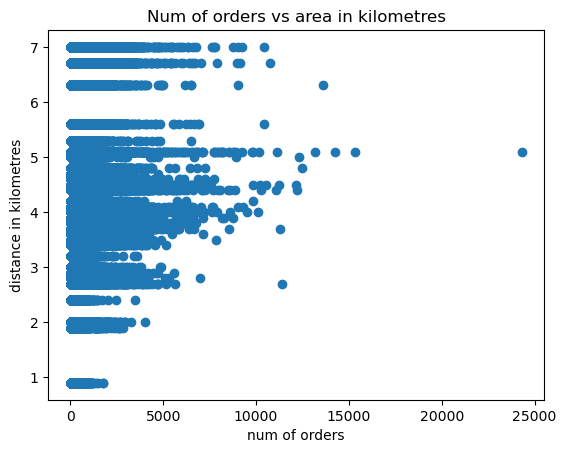

In [22]:
# Scatter plot
plt.scatter(data= final_df, x='num_orders', y='op_area')
plt.title('Num of orders vs area in kilometres')
plt.xlabel('num of orders')
plt.ylabel('distance in kilometres')
plt.show()

In [23]:
# I will segment the area to three division 

def categorize_distance(distance):
    if distance < 3:
        return "near"
    elif distance <= 5:
        return "middle"
    else:
        return "far"

final_df['distance_category'] =final_df['op_area'].apply(categorize_distance)


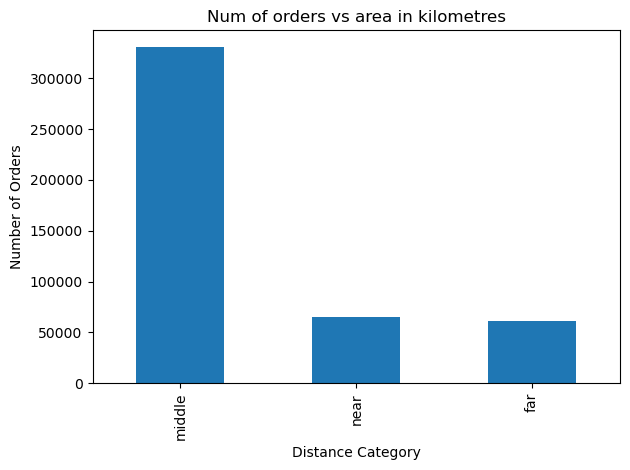

In [24]:
# Bar Chart
final_df['distance_category'].value_counts().plot(kind='bar')
plt.xlabel('Distance Category')
plt.ylabel('Number of Orders')
plt.title('Num of orders vs area in kilometres')
plt.tight_layout()
plt.show()

#### Observations
* In the scatter plot majority of the data points- which are orders are concetrated between 3km and 5km distance. This means that most of the customers are in that area. This is complimented with the bar chart that shows most of orders are the middle distanced customers.
* The scatter plot indicates that most food orders are made within a 1 to 5 kilometers delivery distance, with the number of orders generally decreasing as the distance increases. The highest concentration of orders occurs within shorter distances, which is typical in food delivery services, as closer proximity often leads to more frequent orders.

### WHICH CENTER RECEIVED MOST OF ORDERS

In [25]:
final_df['center_type'].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

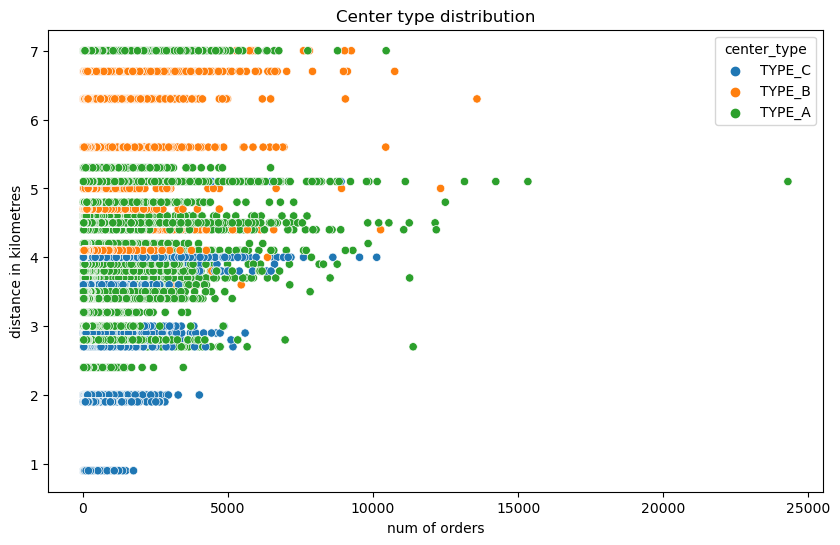

In [26]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='num_orders', y='op_area', hue='center_type')

plt.title('Center type distribution')
plt.xlabel('num of orders')
plt.ylabel('distance in kilometres')
plt.show()


### Observations
* Center Type_A service most of the customers.
* The distribution- Center Type A services has most of the customers between 3 to 5 kms, Type C between 1 to 3 kms and Type B beyond 5 kms

### WHAT DOES PRICE TELL US ABOUT THE NUMBER OF ORDERS

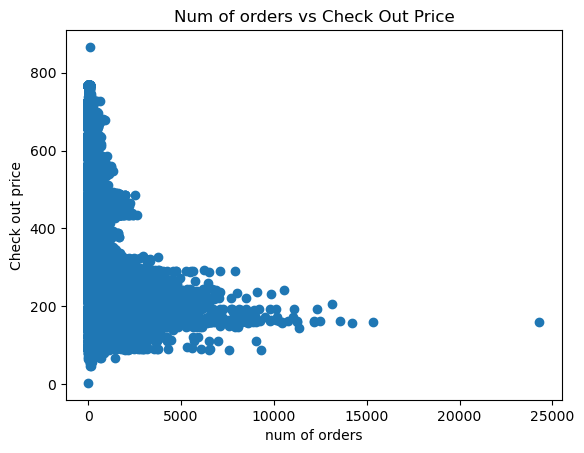

In [27]:

plt.scatter(data= final_df, x='num_orders', y='checkout_price')
plt.title('Num of orders vs Check Out Price')
plt.xlabel('num of orders')
plt.ylabel('Check out price')
plt.show()

### Observations
* Most  orders are concentrated at the lower prices

## PREDICTIVE ANALYTICS

I will add some columns such as discount and do some correlations on the target column-number of orders in order to select the features

In [28]:
# add a column known as discount
final_df['discount']= final_df['base_price']- final_df['checkout_price']

Then perform correlation analysis

In [29]:
# Correlation plot
corr_columns=['week','checkout_price','base_price','emailer_for_promotion',
             'homepage_featured','num_orders','op_area','discount']

In [30]:
correlations=final_df[corr_columns]

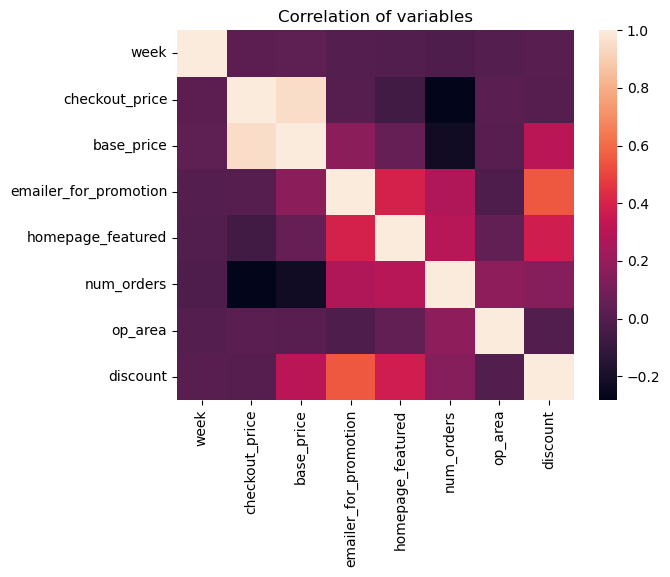

In [31]:
corr = correlations.corr()
# plot heatmap
corr_heat = sns.heatmap(corr)
plt.title('Correlation of variables');

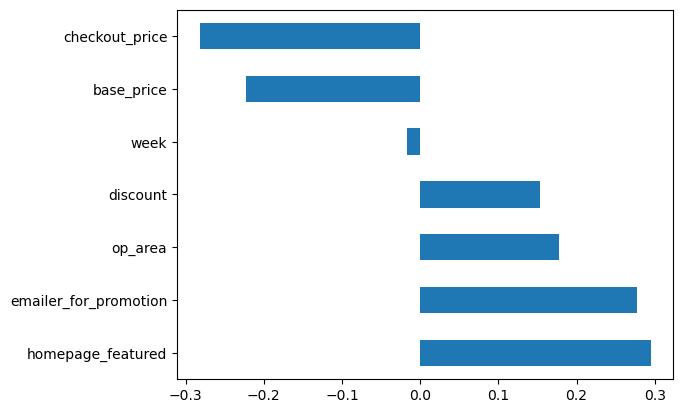

In [32]:
(corr
     .num_orders
     .drop('num_orders') 
     .sort_values(ascending=False)
     .plot
     .barh());

Most of them are not strongly correlated with the target feature(number of orders). I will chooose the numeric features which are positively correlated with number of orders

choose the final variables for predicitve analytics

In [33]:
data= final_df[['emailer_for_promotion','homepage_featured','num_orders','category','cuisine',
                'discount','op_area','center_type','center_id','meal_id','city_code','region_code']]

In [34]:
data.head()

,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,discount,op_area,center_type,center_id,meal_id,city_code,region_code
0,0,0,177,Beverages,Thai,15.46,2.0,TYPE_C,55,1885,647,56
1,0,0,323,Beverages,Thai,16.46,2.0,TYPE_C,55,1885,647,56
2,0,0,96,Beverages,Thai,1.00,2.0,TYPE_C,55,1885,647,56
3,0,0,163,Beverages,Thai,-1.00,2.0,TYPE_C,55,1885,647,56
4,0,0,215,Beverages,Thai,1.00,2.0,TYPE_C,55,1885,647,56


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   emailer_for_promotion  456548 non-null  int64  
 1   homepage_featured      456548 non-null  int64  
 2   num_orders             456548 non-null  int64  
 3   category               456548 non-null  object 
 4   cuisine                456548 non-null  object 
 5   discount               456548 non-null  float64
 6   op_area                456548 non-null  float64
 7   center_type            456548 non-null  object 
 8   center_id              456548 non-null  int64  
 9   meal_id                456548 non-null  int64  
 10  city_code              456548 non-null  int64  
 11  region_code            456548 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 45.3+ MB


In [36]:
# change meal_id,region_code,city_code,center_id to objects from numerical 

In [37]:
data['meal_id'] = data['meal_id'].astype('object')
data['region_code'] = data['region_code'].astype('object')
data['city_code'] = data['city_code'].astype('object')
data['center_id'] = data['center_id'].astype('object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9072\1931676079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['meal_id'] = data['meal_id'].astype('object')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9072\1931676079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region_code'] = data['region_code'].astype('object')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9072\1931676079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [39]:
def preprocessing(data,target_column=None):
    # Separate features and target
    if target_column is not None:
        X = data.drop(target_column, axis=1)
        y = data[target_column]
        
        numeric_features = X.select_dtypes("number").columns
        categorical_features = X.select_dtypes("object").columns
        
        numeric_transformer = Pipeline(
            steps=[("scaler", MinMaxScaler(feature_range=(0, 1)))]
        ) 
        categorical_transformer = Pipeline(
            steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
        )
        
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
            ]
        )
        X_preprocessed = preprocessor.fit_transform(X)
        return X_preprocessed, y
    else:
        # No target column
        X = data.drop(target_column, axis=1)
        y = data[target_column]
        
        numeric_features = X.select_dtypes("number").columns
        categorical_features = X.select_dtypes("object").columns
        
        numeric_transformer = Pipeline(
            steps=[("scaler", MinMaxScaler(feature_range=(0, 1)))]
        ) 
        categorical_transformer = Pipeline(
            steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
        )
        
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features),
            ]
        )
        X_preprocessed = preprocessor.fit_transform(X)
        return X_preprocessed

In [40]:
X, y=preprocessing(data,'num_orders')

In [41]:
print(X.shape)
print(y.shape)

(456548, 212)
(456548,)


In [ ]:
# SPlit the data

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (365238, 212)
y_train shape: (365238,)
X_test shape: (91310, 212)
y_test shape: (91310,)


In [44]:
#Linear regression
lr=LinearRegression()
lr.fit(X_train, y_train) # Train the model on the training data
 # Evaluate the model on the validation set
y_pred = lr.predict(X_test)

In [45]:
# calaculate the metrics
# R-squared
lr_r2 = r2_score(y_test, y_pred)

# Mean Squared Error
lr_mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", lr_r2)
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)

R-squared: 0.479888953812995
Mean Squared Error: 78950.36843849815
Mean Absolute Error: 153.64151662971747


In [46]:
df = pd.DataFrame(data={"Actual Values": y_test, "Predictions": y_pred})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
203536,257,614.94
301801,150,450.37
254032,620,730.02
339158,42,33.95
3203,13,-62.38


In [47]:
# KNeighbors regressor
knr=KNeighborsRegressor()
knr.fit(X_train, y_train) # Train the model on the training data
 # Evaluate the model on the validation set
y_pred_knr = knr.predict(X_test)

In [48]:
# R-squared
knr_r2 = r2_score(y_test, y_pred_knr)

# Mean Squared Error
knr_mse = mean_squared_error(y_test, y_pred_knr)

# Mean Absolute Error
knr_mae = mean_absolute_error(y_test, y_pred_knr)

print("R-squared:", knr_r2)
print("Mean Squared Error:", knr_mse)
print("Mean Absolute Error:", knr_mae)

R-squared: 0.7649713735729347
Mean Squared Error: 35676.22104172599
Mean Absolute Error: 85.32239404227357


In [49]:
df = pd.DataFrame(data={"Actual Values": y_test, "Predictions": y_pred_knr})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
203536,257,197.40
301801,150,510.80
254032,620,511.20
339158,42,44.00
3203,13,62.60


In [50]:
# random fores regressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train) # Train the model on the training data
 # Evaluate the model on the validation set
y_pred_rf = rf.predict(X_test)

In [51]:
# R-squared
rf_r2 = r2_score(y_test, y_pred_rf)

# Mean Squared Error
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Mean Absolute Error
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("R-squared:", rf_r2)
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)

R-squared: 0.8093778661329571
Mean Squared Error: 28935.52792555891
Mean Absolute Error: 80.56581839597389


In [52]:
df = pd.DataFrame(data={"Actual Values": y_test, "Predictions": y_pred_rf})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
203536,257,178.09
301801,150,506.51
254032,620,517.27
339158,42,44.66
3203,13,64.15


In [53]:
from xgboost import XGBRegressor

# create models
xg = XGBRegressor()
xg.fit(X_train, y_train) # Train the model on the training data
 # Evaluate the model on the validation set
y_pred_xg = xg.predict(X_test)

In [54]:
xg_r2 = r2_score(y_test, y_pred_xg)

# Mean Squared Error
xg_mse = mean_squared_error(y_test, y_pred_xg)

# Mean Absolute Error
xg_mae = mean_absolute_error(y_test, y_pred_xg)

print("R-squared:", xg_r2)
print("Mean Squared Error:", xg_mse)
print("Mean Absolute Error:", xg_mae)

R-squared: 0.8032479515113498
Mean Squared Error: 29866.01963770462
Mean Absolute Error: 85.95069151646372


In [55]:
df = pd.DataFrame(data={"Actual Values": y_test, "Predictions": y_pred_xg})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
203536,257,270.68
301801,150,640.29
254032,620,401.20
339158,42,40.63
3203,13,79.33


In [56]:
# Check how the models are all performing in a visual manner

models = ['Linear Regression','RandomForest Regressor','KNeighbors Regressor','XGB Regressor']
r2_values = [lr_r2, rf_r2,knr_r2,xg_r2]
mse_values = [lr_mse, rf_mse,knr_mse,xg_mse]
mae_values = [lr_mae, rf_mae, knr_mae,xg_mae]

# Print or visualize the comparison
for model, r2, mse, mae in zip(models, r2_values, mse_values, mae_values):
    print(f'Model: {model}')
    print(f'R-squared: {r2}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print('\n')

Model: Linear Regression
R-squared: 0.479888953812995
Mean Squared Error: 78950.36843849815
Mean Absolute Error: 153.64151662971747


Model: RandomForest Regressor
R-squared: 0.8093778661329571
Mean Squared Error: 28935.52792555891
Mean Absolute Error: 80.56581839597389


Model: KNeighbors Regressor
R-squared: 0.7649713735729347
Mean Squared Error: 35676.22104172599
Mean Absolute Error: 85.32239404227357


Model: XGB Regressor
R-squared: 0.8032479515113498
Mean Squared Error: 29866.01963770462
Mean Absolute Error: 85.95069151646372


